# Video Game Markert Analyzation

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
video = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
video = video.dropna(axis = 0)
# change "Year_of_Release" from float to integer
video['Year_of_Release'] = video['Year_of_Release'] .astype(int)
# change "User_Score" from string to float
video['User_Score'] = video['User_Score'] .astype(float)
video.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


# Visualization and Analyzation
## Top 10 Games

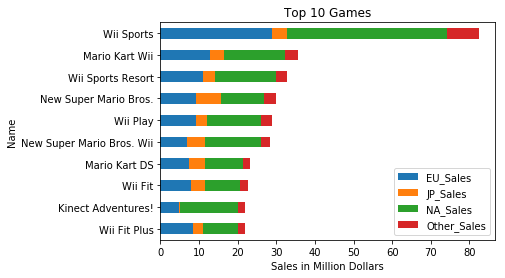

In [2]:
top = video.sort_values('Global_Sales',ascending=False)[:10]
top = top.pivot_table(index=['Name'],values=['NA_Sales','EU_Sales','JP_Sales',
                                             'Other_Sales','Global_Sales'],aggfunc=np.sum)
top = top.sort_values('Global_Sales',ascending=True).drop('Global_Sales',axis=1)
top = top.plot(kind='barh',stacked=True,title='Top 10 Games')
top.set_xlabel('Sales in Million Dollars')
top

## Yearly Sales By Region

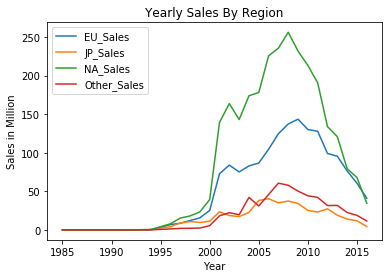

In [3]:
region = video.pivot_table(index=['Year_of_Release'],values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],
                          aggfunc=np.sum)
region = region.plot(title='Yearly Sales By Region')
region.set_xlabel('Year')
region.set_ylabel('Sales in Million')
region

From this figure we can conclude that North America sale and Europe sale are higher than other countries, so the global sale is very positively correlated to NA_Sales and EU_Sales

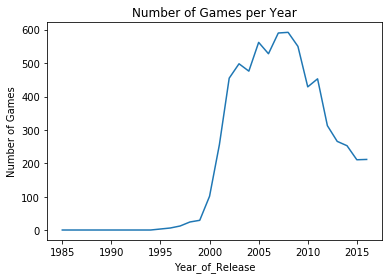

In [4]:
counts = video.groupby(['Year_of_Release']).Name.count()
counts = counts.plot(title='Number of Games per Year')
counts.set_ylabel('Number of Games')
counts

The Global_Sales depends on the number of games released on that year.

## Yearly Sales By Genre

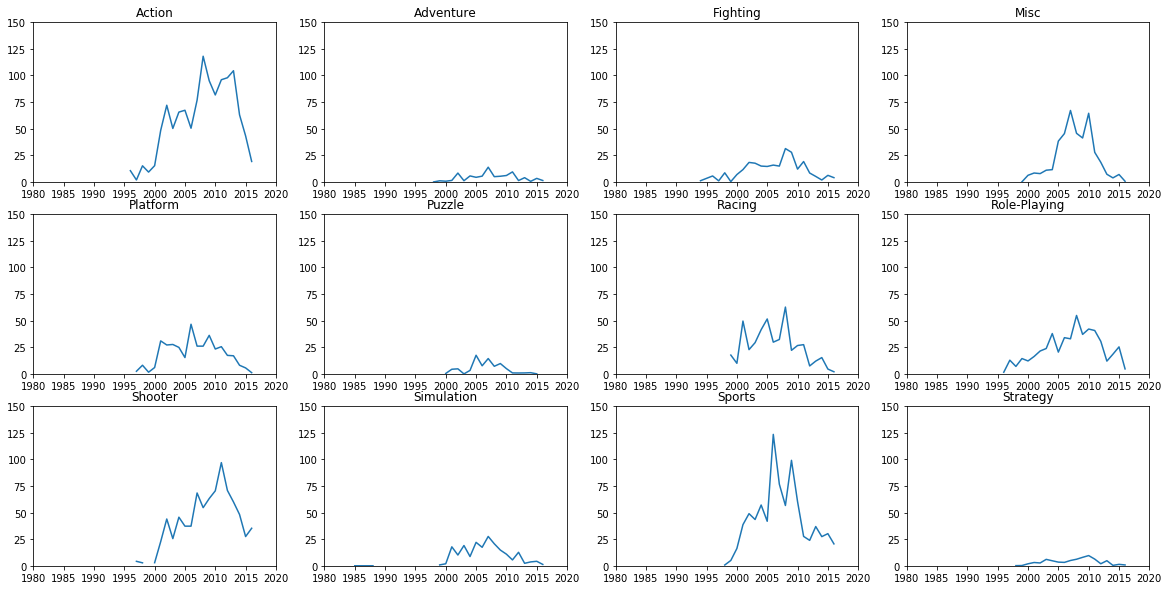

In [5]:
genre = video.pivot_table(index=['Year_of_Release'], values=['Global_Sales'], columns=['Genre'], aggfunc=np.sum, dropna=False)['Global_Sales']
i = 1
plt.figure(figsize=(20,10))
for g in genre.columns:
    plt.subplot(3,4,i)
    plt.xlim(1980,2020)
    plt.ylim(0,150)
    plt.plot(genre.index.values,genre[g].values)
    plt.title(g)
    i += 1
plt.show()

The above graph shows the trend in sales by genre. We can see that Action, Shooter and Sports games are popular in recent years. 

## Critic Score vs Global Sales

[(0, 100)]

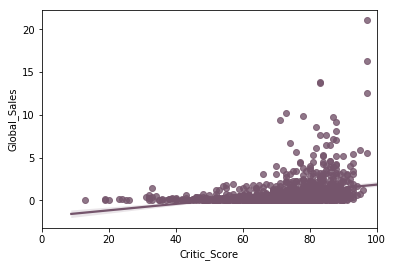

In [6]:
import seaborn as sns
sns.regplot(x="Critic_Score", y="Global_Sales", data=video[(video['Year_of_Release']>=2012)],color="#75556c").set(xlim=(0, 100))

The Global Sales doesn't change a lot throughout the Critic Score, but a higher Critic Score may has a higher Global Sales.

## User Score vs Global Sales

[(0, 10)]

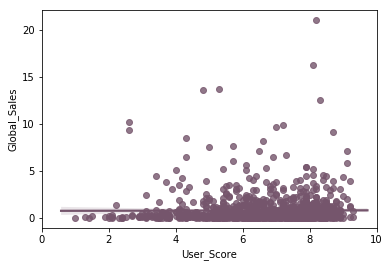

In [7]:
sns.regplot(x="User_Score", y="Global_Sales", data=video[(video['Year_of_Release']>=2012)],color="#75556c").set(xlim=(0, 10))

We can see that the regression line is almost horizontal, so we can conclude that user score has no effect on Global_Sales.

## Total Sales By Platforms

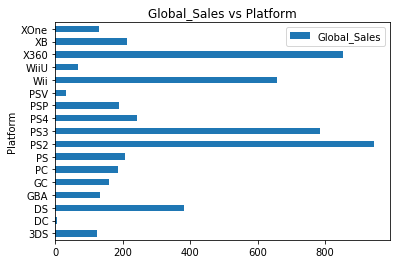

In [8]:
platform = video.pivot_table(index=['Platform'], values=['Global_Sales'],aggfunc=np.sum, dropna=False)
platform.plot(kind='barh',title='Global_Sales vs Platform')

We can see that PS2 has the highest Global_Sales,PS3,Wii and X360 also have high Global_Sales. However, most of the platforms are discontinued, so most players may choose PC, PS4, XOne or WiiU. In these four platforms, PS4 has the highest Global_Sales.

## PC vs PS4 vs XOne vs WiiU

In [9]:
ppxw = video[(video['Platform'] == 'WiiU') | (video['Platform'] == 'PS4') | (video['Platform'] == 'XOne')|(video['Platform'] == 'PC')]
### wiiu, ps4 and xone are released after 2012
ppxw = ppxw[(ppxw['Year_of_Release']>=2012)]
ppxw.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
42,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
77,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.81,3.48,0.14,1.23,7.66,83.0,39.0,5.7,1443.0,Sledgehammer Games,M
94,FIFA 17,PS4,2016,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85.0,41.0,5.0,398.0,"EA Sports, EA Vancouver",E
105,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.0,58.0,6.5,4228.0,Bethesda Game Studios,M


### Global_Sales Over Recent Years 

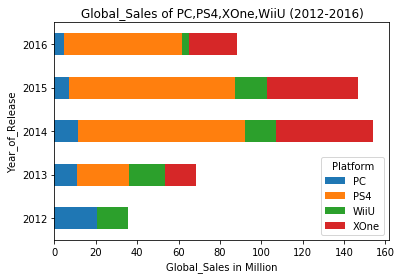

In [10]:
temp = ppxw.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
temp = temp.unstack().plot(kind='barh',stacked=True,title='Global_Sales of PC,PS4,XOne,WiiU (2012-2016)')
temp.set_xlabel('Global_Sales in Million')
temp

From this figure we can see that PS4 global sales exceed PC,WiiU and XOne.It also implies that user amount of PS4 is greater than WiiU and XOne. 

### Global_Sales vs Rating

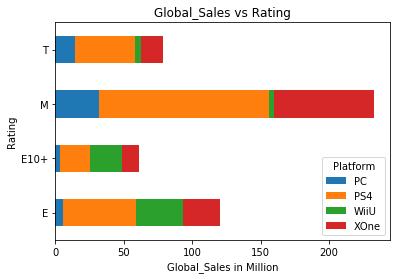

In [11]:
temp = ppxw.groupby(['Rating','Platform']).Global_Sales.sum()
temp = temp.unstack().plot(kind='barh',stacked=True,title='Global_Sales vs Rating')
temp.set_xlabel('Global_Sales in Million')
temp

We can see that PC,PS4 and XOne produced games primarily for Matures, WiiU produced games primarily for Everyone. PS4 has the highest sales for Teens,Matures and Everyone, therefore PS4 can dominate the total Global_Sales.

###  Global_Sales vs Genre

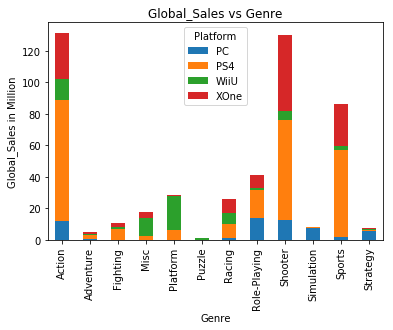

In [12]:
temp = ppxw.groupby(['Genre','Platform']).Global_Sales.sum()
temp = temp.unstack().plot(kind='bar',stacked=True,title='Global_Sales vs Genre')
temp.set_ylabel('Global_Sales in Million')
temp

From this figure we can conclude that PS4 dominates most genres, so it has the highest global sales.

To conclude, PS4 has the highest total global sales because it dominate most Ratings and Genres of video games. So most gamers may want to buy PS4 for playing video games.

## Predict hits (sales above 1 million units)

In [13]:
df = video[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']].copy()
df = df.dropna().reset_index(drop=True)
table = df[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']].copy()
def hits(sales):
    if sales >= 1:
        return 1
    else:
        return 0
table['Global_Sales'] = table['Global_Sales'].apply(lambda x:hits(x))
table.rename(columns={'Global_Sales':'Hits'},inplace = True)
table.head()

,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Hits
0,Wii,Sports,Nintendo,2006,76.0,1
1,Wii,Racing,Nintendo,2008,82.0,1
2,Wii,Sports,Nintendo,2009,80.0,1
3,DS,Platform,Nintendo,2006,89.0,1
4,Wii,Misc,Nintendo,2006,58.0,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from pandas import get_dummies
from sklearn.metrics import classification_report
prd_table = pd.get_dummies(table)
prd_table.head()

,Year_of_Release,Critic_Score,Hits,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,...,Publisher_Xicat Interactive,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software,Publisher_inXile Entertainment
0,2006,76.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008,82.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2009,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006,89.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,58.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y = prd_table['Hits'].values
X = prd_table.drop(['Hits'],axis = 1).values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
lr = LogisticRegression().fit(Xtrain,ytrain)
lr_y_prd = lr.predict(Xtest)
print("Accuracy of LR Classifier:", lr.score(Xtest,ytest))
print(classification_report(ytest,lr_y_prd))

Accuracy of LR Classifier: 0.85009765625
             precision    recall  f1-score   support

          0       0.87      0.96      0.91      1661
          1       0.68      0.39      0.49       387

avg / total       0.83      0.85      0.83      2048



[Text(51,0.5,'Expected Value'), Text(0.5,19.5,'Predicted Value')]

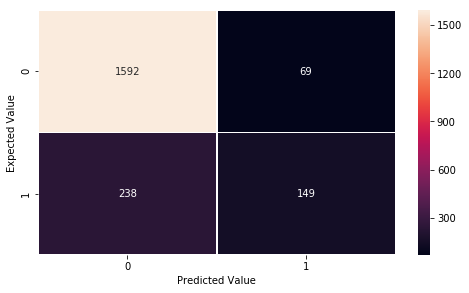

In [17]:
fig, ax = plt.subplots(figsize=(8,4.5))
sns.heatmap(confusion_matrix(ytest, lr_y_prd), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')

### Predict 2016 games can become hits

In [18]:
not_hit = prd_table[table['Hits']==0]
y = not_hit['Hits'].values
X = not_hit.drop(['Hits'],axis=1).values
prd = lr.predict_proba(X)
df = df[df['Global_Sales']<1]
df['Hit_prob'] = prd[:,1]
df = df[df['Year_of_Release']==2016]
df.sort_values(['Hit_prob'],ascending=False,inplace=True)
top10 = df[['Name','Platform','Genre','Hit_prob']]
top10[:10].reset_index(drop=True)

,Name,Platform,Genre,Hit_prob
0,Dishonored 2,PS4,Action,0.838694
1,Titanfall 2,PS4,Shooter,0.781078
2,Dishonored 2,XOne,Action,0.774791
3,Titanfall 2,XOne,Shooter,0.662967
4,Skylanders Imaginators,PS4,Platform,0.633101
5,Plants vs. Zombies: Garden Warfare 2,PS4,Shooter,0.632329
6,Kirby: Planet Robobot,3DS,Action,0.559885
7,BioShock The Collection,PS4,Shooter,0.555193
8,Lego Star Wars: The Force Awakens,PS4,Action,0.553584
9,Deus Ex: Mankind Divided,PS4,Role-Playing,0.524492
